In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import os.path as osp

In [3]:
pd.set_option("display.max_rows", 10)

In [4]:
ds = "/Users/semio/src/work/Gapminder/datasets/open-numbers/ddf--ihme--global_burden_disease_deaths/deaths"

In [5]:
causes = {724: "homicide", 718: "suicide", 689: "traffic"}

In [6]:
#       0-4, 5-9 .. 75-79      , 80-84 .. 90-94, 95+, age_standardized
ages = [ 1, *list(range(6, 21)), 30, 31, 32,     235, 27]

In [7]:
to_concat = []

for c, v in causes.items():
    df = pd.read_csv(osp.join(ds, f"ddf--datapoints--deaths_rate--by--location--sex--age--cause-{c}--year.csv"))
    df['cause'] = v
    df = df[df.age.isin(ages)]
    to_concat.append(df)

In [8]:
data = pd.concat(to_concat)

In [9]:
data.sample(10)

,location,sex,age,cause,year,deaths_rate
315450,218,2,14,suicide,1999,9.48
129350,75,1,12,homicide,2010,1.09
46680,29,2,1,homicide,2014,1.18
4163,7,3,20,traffic,1995,27.71
200030,111,2,11,homicide,2004,5.16
59412,37,1,14,homicide,2002,21.54
146793,83,1,10,homicide,2011,1.50
57208,36,1,13,traffic,2012,48.77
353952,193,3,15,traffic,1999,36.73
167339,92,2,15,traffic,2010,2.53


In [10]:
data.age.unique()

array([  1,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  27,  30,  31,  32, 235])

In [11]:
data.age.unique().shape

(21,)

In [12]:
std_pop = pd.read_csv('../source/std_pop.csv')

In [13]:
std_pop

,age,percentage
0,0-4,8.860
1,5-9,8.690
2,10-14,8.600
3,15-19,8.470
4,20-24,8.220
...,...,...
16,80-84,0.910
17,85-89,0.440
18,90-94,0.150
19,95-99,0.040


In [14]:
std_pop = std_pop.set_index('age')['percentage']

In [15]:
std_pop

age
0-4      8.860
5-9      8.690
10-14    8.600
15-19    8.470
20-24    8.220
         ...  
80-84    0.910
85-89    0.440
90-94    0.150
95-99    0.040
100+     0.005
Name: percentage, Length: 21, dtype: float64

In [16]:
!mkdir ../source/gbd

mkdir: ../source/gbd: File exists


In [17]:
sym = pd.read_csv('../source/ddf--synonyms--country.csv')
sym = sym.set_index('synonym')['country'].to_dict()

In [18]:
locations = pd.read_csv('../source/ddf--entities--location.csv')

In [19]:
u = data.location.unique()

In [20]:
locations = locations[locations.location.isin(u)]

In [21]:
for n in locations.medium_name.values:
    if n not in sym:
        print(n)

In [22]:
locations['geo'] = locations['medium_name'].map(sym)

In [23]:
locations_map = locations.set_index('location')['geo'].to_dict()

In [24]:
# asdr, for all ages

In [25]:
df1 = data[data.age == 27].copy()

In [26]:
df1 = df1.drop('age', axis=1)

In [27]:
df1

,location,sex,cause,year,deaths_rate
594,6,1,homicide,1990,4.89
595,6,1,homicide,1991,4.91
596,6,1,homicide,1992,4.87
597,6,1,homicide,1993,4.89
598,6,1,homicide,1994,4.93
...,...,...,...,...,...
424165,522,3,traffic,2012,45.38
424166,522,3,traffic,2013,44.93
424167,522,3,traffic,2014,44.37
424168,522,3,traffic,2015,43.66


In [28]:
df1 = df1.rename(columns={'deaths_rate': 'deaths_rate_all_age'})

In [29]:
df1.location = df1.location.map(locations_map)

In [30]:
df1

,location,sex,cause,year,deaths_rate_all_age
594,chn,1,homicide,1990,4.89
595,chn,1,homicide,1991,4.91
596,chn,1,homicide,1992,4.87
597,chn,1,homicide,1993,4.89
598,chn,1,homicide,1994,4.93
...,...,...,...,...,...
424165,sdn,3,traffic,2012,45.38
424166,sdn,3,traffic,2013,44.93
424167,sdn,3,traffic,2014,44.37
424168,sdn,3,traffic,2015,43.66


In [31]:
df1.to_csv('../source/gbd/deaths_rate_all_age.csv', index=False)

In [32]:
# 0-14 rate

In [33]:
a = [1, 6, 7]  # under 5, 5-9, 10-14

In [34]:
w = std_pop.loc[['0-4', '5-9', '10-14']].values

In [35]:
w

array([8.86, 8.69, 8.6 ])

In [36]:
df2 = data[data.age.isin(a)].copy()

In [37]:
totalp = sum(w)

In [38]:
totalp

26.15

In [39]:
df2

,location,sex,age,cause,year,deaths_rate
0,6,1,1,homicide,1990,5.35
1,6,1,1,homicide,1991,5.23
2,6,1,1,homicide,1992,4.99
3,6,1,1,homicide,1993,4.77
4,6,1,1,homicide,1994,4.75
...,...,...,...,...,...,...
423733,522,3,7,traffic,2012,18.52
423734,522,3,7,traffic,2013,18.30
423735,522,3,7,traffic,2014,17.95
423736,522,3,7,traffic,2015,17.61


In [40]:
df2[df2.age == a[2]].shape

(47142, 6)

In [41]:
df2_groups = [(df2[df2.age == x].copy()
               .drop('age', axis=1)
               .set_index(['location', 'sex', 'cause', 'year'])) for x in a]

In [42]:
weights = [x/totalp for x in w]

In [43]:
df2_final = sum([(weights[i] * df2_groups[i]) for i in range(3)])

In [44]:
df2_final[pd.isnull(df2_final['deaths_rate'])]

deaths_rate
location sex cause   year             
6        1   suicide 1990          NaN
                     1991          NaN
                     1992          NaN
                     1993          NaN
                     1994          NaN
...                                ...
522      3   suicide 2012          NaN
                     2013          NaN
                     2014          NaN
                     2015          NaN
                     2016          NaN

[15714 rows x 1 columns]

In [45]:
df2_final = df2_final.dropna()

In [46]:
df2_final.query('location == 68 and cause == "homicide" and year >= 1999 and sex == 3')

deaths_rate
location sex cause    year             
68       3   homicide 1999     0.817052
                      2000     0.850769
                      2001     0.931725
                      2002     0.995675
                      2003     1.009228
...                                 ...
                      2012     0.694054
                      2013     0.657277
                      2014     0.637078
                      2015     0.623591
                      2016     0.616880

[18 rows x 1 columns]

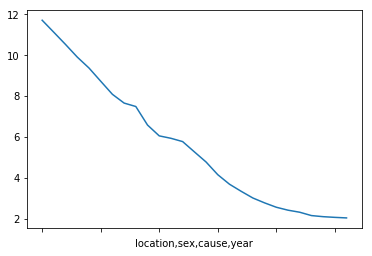

In [47]:
df2_final.query('location == 68 and cause == "traffic" and year >= 1990 and sex == 3')['deaths_rate'].plot()

In [48]:
df2_final = df2_final.reset_index()
df2_final.location = df2_final.location.map(locations_map)

In [49]:
df2_final.to_csv('../source/gbd/deaths_rate_014.csv', index=False)

In [50]:
# 15-29

In [51]:
a = [8, 9, 10]

In [52]:
w = std_pop.loc[['15-19', '20-24', '25-29']].values

In [53]:
w

array([8.47, 8.22, 7.93])

In [54]:
totalp = sum(w)

In [55]:
df3 = data[data.age.isin(a)].copy()

In [56]:
df3_groups = [(df3[df3.age == x].copy()
               .drop('age', axis=1)
               .set_index(['location', 'sex', 'cause', 'year'])) for x in a]

In [57]:
weights = [x/totalp for x in w]

In [58]:
df3_final = sum([(weights[i] * df3_groups[i]) for i in range(3)])

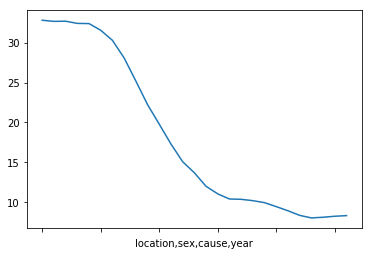

In [59]:
(df3_final
 .query('location == 68 and cause == "traffic" and year >= 1990 and sex == 3')['deaths_rate'].plot())

In [60]:
df3_final = df3_final.dropna().reset_index()
df3_final.location = df3_final.location.map(locations_map)

In [61]:
df3_final.to_csv('../source/gbd/deaths_rate_1529.csv', index=False)

In [62]:
# 30-44

In [63]:
a = [11, 12, 13]
w = std_pop.loc[['30-34', '35-39', '40-44']].values

In [64]:
w

array([7.61, 7.15, 6.59])

In [65]:
totalp = sum(w)

In [66]:
df4 = data[data.age.isin(a)].copy()

In [67]:
df4_groups = [(df4[df4.age == x].copy()
               .drop('age', axis=1)
               .set_index(['location', 'sex', 'cause', 'year'])) for x in a]

In [68]:
weights = [x/totalp for x in w]

In [69]:
df4_final = sum([(weights[i] * df4_groups[i]) for i in range(3)])

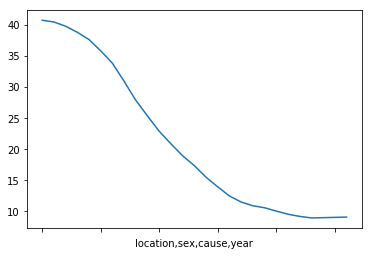

In [70]:
(df4_final
 .query('location == 68 and cause == "traffic" and year >= 1990 and sex == 3')['deaths_rate'].plot())

In [71]:
df4_final = df4_final.dropna().reset_index()
df4_final.location = df4_final.location.map(locations_map)

In [72]:
df4_final.to_csv('../source/gbd/deaths_rate_3044.csv', index=False)

In [73]:
# 45-59

In [74]:
a = [14, 15, 16]
w = std_pop.loc[['45-49', '50-54', '55-59']].values

In [75]:
w

array([6.04, 5.37, 4.55])

In [76]:
totalp = sum(w)
df5 = data[data.age.isin(a)].copy()
df5_groups = [(df5[df5.age == x].copy()
               .drop('age', axis=1)
               .set_index(['location', 'sex', 'cause', 'year'])) for x in a]
weights = [x/totalp for x in w]
df5_final = sum([(weights[i] * df5_groups[i]) for i in range(3)])

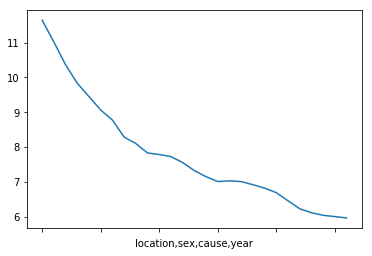

In [77]:
(df5_final
 .query('location == 71 and cause == "traffic" and year >= 1990 and sex == 3')['deaths_rate'].plot())

In [78]:
df5_final = df5_final.dropna().reset_index()
df5_final.location = df5_final.location.map(locations_map)

In [79]:
df5_final.to_csv('../source/gbd/deaths_rate_4559.csv', index=False)

In [80]:
# 60plus

In [81]:
a = [17, 18, 19, 20, 30, 31, 32, 235]
w = std_pop.loc['60-64':].values

In [82]:
w

array([3.72 , 2.96 , 2.21 , 1.52 , 0.91 , 0.44 , 0.15 , 0.04 , 0.005])

In [83]:
w_ = list(w[:-2])

In [84]:
w_

[3.72, 2.96, 2.21, 1.52, 0.91, 0.44, 0.15]

In [85]:
w_.append(sum(w[-2:]))

In [86]:
w_

[3.72, 2.96, 2.21, 1.52, 0.91, 0.44, 0.15, 0.045]

In [87]:
totalp = sum(w_)
df6 = data[data.age.isin(a)].copy()
df6_groups = [(df6[df6.age == x].copy()
               .drop('age', axis=1)
               .set_index(['location', 'sex', 'cause', 'year'])) for x in a]
weights = [x/totalp for x in w_]
df6_final = sum([(weights[i] * df6_groups[i]) for i in range(len(w_))])

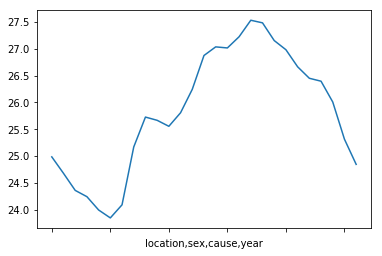

In [88]:
(df6_final
 .query('location == 97 and cause == "traffic" and year >= 1990 and sex == 3')['deaths_rate'].plot())

In [89]:
df6_final = df6_final.dropna().reset_index()
df6_final.location = df6_final.location.map(locations_map)

In [90]:
df6_final.to_csv('../source/gbd/deaths_rate_60plus.csv', index=False)